In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",None)

In [6]:
df = pd.read_csv("imdb_anime.csv")
df.head()

Title                         Genre  \
0                                    One Piece  Animation, Action, Adventure   
1  Teenage Mutant Ninja Turtles: Mutant Mayhem  Animation, Action, Adventure   
2                  The Super Mario Bros. Movie  Animation, Adventure, Comedy   
3                              Attack on Titan  Animation, Action, Adventure   
4                               Jujutsu Kaisen  Animation, Action, Adventure   

  User Rating Number of Votes Runtime         Year  \
0         8.9         187,689  24 min     (1999– )   
1         7.4          28,895  99 min       (2023)   
2         7.1         189,108  92 min       (2023)   
3         9.1         434,457  24 min  (2013–2023)   
4         8.5          82,909  24 min     (2020– )   

                                             Summary  \
0  Follows the adventures of Monkey D. Luffy and ...   
1  The film follows the Turtle brothers as they w...   
2  A plumber named Mario travels through an under...   
3  After his hometown is destroyed and his mother...   
4  A boy swallows a cursed talisman - the finger ...   

                                               Stars Certificate   Metascore  \
0  Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14         NaN   
1                                                NaN          PG  74           
2                                                NaN          PG  46           
3  Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA         NaN   
4  Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA         NaN   

    Gross Episode Episode Title  
0  187689       0           NaN  
1   28895       0           NaN  
2  189108       0           NaN  
3  434457       0           NaN  
4   82909       0           NaN

# EDA

In [7]:
df.dtypes

Title              object
Genre              object
User Rating        object
Number of Votes    object
Runtime            object
Year               object
Summary            object
Stars              object
Certificate        object
Metascore          object
Gross              object
Episode            object
Episode Title      object
dtype: object

In [8]:
row , cols = df.shape
row , cols

(45717, 13)

In [9]:
missing = df.isna().sum()
missing

Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime            13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Metascore          45376
Gross              20708
Episode                0
Episode Title      10807
dtype: int64

In [10]:
# to check total missing values in dataset -- df.isna().sum().sum() -- OR
total = df.isna().values.sum()
total

202835

In [11]:
(missing/row)*100 # %age of missing values in each column wrt to total rows.

Title               0.000000
Genre               0.000000
User Rating        45.296061
Number of Votes    45.296061
Runtime            28.803290
Year                0.275609
Summary            48.493996
Stars              70.085526
Certificate        37.235602
Metascore          99.254107
Gross              45.296061
Episode             0.000000
Episode Title      23.638909
dtype: float64

In [12]:
def col_with_many_missing_values(data, thresh):
    missing = df.isna().sum()
    row , cols = df.shape
    missing_per = (missing/row)*100
    return missing_per[missing_per>=thresh]
col_with_many_missing_values(df, 50)

Stars        70.085526
Metascore    99.254107
dtype: float64

In [13]:
df.Stars.unique()

array(['Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Tony Beck', nan,
       'Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ishikawa', ...,
       'Lizzie Freeman,Kellen Goff,Mick Lauer,Ryan Colt Levy',
       'Bryn Apprill,Anthony Bowling,Charles C. Campbell,Greg Dulcie',
       'Ogie Banks,Deborah Sale Butler,John DeMita,Richard Epcar'],
      dtype=object)

In [14]:
len(df[df["Metascore"].isna()])

45376

In [15]:
(missing/total)*100 # %age of missing values in each column

Title               0.000000
Genre               0.000000
User Rating        10.209283
Number of Votes    10.209283
Runtime             6.491976
Year                0.062119
Summary            10.930066
Stars              15.796583
Certificate         8.392536
Metascore          22.370893
Gross              10.209283
Episode             0.000000
Episode Title       5.327976
dtype: float64

In [16]:
df1 = df.drop(["Metascore"], axis =1)
df1.isna().sum()

Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime            13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Gross              20708
Episode                0
Episode Title      10807
dtype: int64

# Feature Engineering

In [17]:
def isfloat(x) : 
    try :
        return float(x)
    except :
        return x

df2 = df1.copy()

In [18]:
df2 = df2[~(df2['User Rating'] == 'User Rating')]
df2["User Rating"] = df2["User Rating"].apply(isfloat)
df2.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes     object
Runtime             object
Year                object
Summary             object
Stars               object
Certificate         object
Gross               object
Episode             object
Episode Title       object
dtype: object

In [19]:
df2["Gross"] = pd.to_numeric(df2["Gross"], errors="coerce")
df2["Episode"] = pd.to_numeric(df2["Episode"], errors="coerce")
df2.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes     object
Runtime             object
Year                object
Summary             object
Stars               object
Certificate         object
Gross              float64
Episode              int64
Episode Title       object
dtype: object

In [20]:
df2["Number of Votes"].unique()

array(['187,689', '28,895', '189,108', ..., '3,375', '3,309', '2,743'],
      dtype=object)

In [21]:
df2["Number of Votes"] =df2["Number of Votes"].str.replace(",","")
df2["Number of Votes"].unique()

array(['187689', '28895', '189108', ..., '3375', '3309', '2743'],
      dtype=object)

In [22]:
df2["Number of Votes"] = pd.to_numeric(df2["Number of Votes"], errors="coerce")
df2.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes    float64
Runtime             object
Year                object
Summary             object
Stars               object
Certificate         object
Gross              float64
Episode              int64
Episode Title       object
dtype: object

In [23]:
#df3["Runtime"] = 
df2["Runtime"] = df2["Runtime"].apply(lambda x : (str(x).split(" ")[0])) # to remove the "min" part.
df3 = df2.rename(columns = {"Runtime":"Runtime_in_min"},errors="raise")
df3

Title  \
0                                        One Piece   
1      Teenage Mutant Ninja Turtles: Mutant Mayhem   
2                      The Super Mario Bros. Movie   
3                                  Attack on Titan   
4                                   Jujutsu Kaisen   
...                                            ...   
45712               Demon Slayer: Kimetsu no Yaiba   
45713               Demon Slayer: Kimetsu no Yaiba   
45714                                    One Piece   
45715                                Marmalade Boy   
45716                              Cinderella Nine   

                              Genre  User Rating  Number of Votes  \
0      Animation, Action, Adventure          8.9         187689.0   
1      Animation, Action, Adventure          7.4          28895.0   
2      Animation, Adventure, Comedy          7.1         189108.0   
3      Animation, Action, Adventure          9.1         434457.0   
4      Animation, Action, Adventure          8.5          82909.0   
...                             ...          ...              ...   
45712  Animation, Action, Adventure          7.3           3432.0   
45713  Animation, Action, Adventure          7.9           3309.0   
45714  Animation, Action, Adventure          9.4           2743.0   
45715      Animation, Comedy, Drama          NaN              NaN   
45716       Animation, Drama, Sport          6.0              6.0   

      Runtime_in_min         Year  \
0                 24     (1999– )   
1                 99       (2023)   
2                 92       (2023)   
3                 24  (2013–2023)   
4                 24     (2020– )   
...              ...          ...   
45712             24     (2019– )   
45713             24     (2019– )   
45714            nan     (1999– )   
45715             24  (1994–2005)   
45716             24     (2019– )   

                                                 Summary  \
0      Follows the adventures of Monkey D. Luffy and ...   
1      The film follows the Turtle brothers as they w...   
2      A plumber named Mario travels through an under...   
3      After his hometown is destroyed and his mother...   
4      A boy swallows a cursed talisman - the finger ...   
...                                                  ...   
45712  Tanjiro heads to his next location southeast; ...   
45713  Tanjiro gets separated from Zenitsu when he en...   
45714  Carrot tells Sanji the news about Pedro. Germa...   
45715                                                NaN   
45716  On her very first day at Satogahama Municipal ...   

                                                   Stars Certificate  \
0      Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14   
1                                                    NaN          PG   
2                                                    NaN          PG   
3      Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA   
4      Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA   
...                                                  ...         ...   
45712                                                NaN       TV-14   
45713                                                NaN       TV-MA   
45714  Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...       TV-14   
45715  Ogie Banks,Deborah Sale Butler,John DeMita,Ric...   Not Rated   
45716                                                NaN         NaN   

          Gross  Episode                                   Episode Title  
0      187689.0        0                                             NaN  
1       28895.0        0                                             NaN  
2      189108.0        0                                             NaN  
3      434457.0        0                                             NaN  
4       82909.0        0                                             NaN  
...         ...      ...                                             ...  
45712    34

In [24]:
# df3["Runtime_in_min"] = df3["Runtime_in_min"].str.replace(",", "") -- OR
df3["Runtime_in_min"] = df3["Runtime_in_min"].str.replace("[\,]", "", regex=True) # -- To Remove ","" from in between.

In [25]:
df3.Runtime_in_min.unique()

array(['24', '99', '92', '102', '20', '100', '25', '124', '110', '125',
       '91', '23', '119', '81', '130', 'nan', '108', '115', '95', '45',
       '105', '106', '96', '87', '93', '98', '83', '84', '89', '90', '97',
       '103', '134', '88', '122', '118', '101', '85', '86', '78', '104',
       '112', '126', '325', '117', '264', '22', '82', '75', '77', '30',
       '94', '316', '121', '111', '63', '51', '50', '10', '137', '79',
       '46', '113', '154', '80', '109', '69', '26', '151', '76', '116',
       '165', '21', '47', '12', '300', '71', '120', '140', '68', '360',
       '16', '73', '107', '15', '114', '4', '129', '384', '40', '54',
       '132', '72', '27', '74', '29', '253', '53', '135', '8', '48',
       '128', '275', '55', '52', '138', '14', '288', '57', '70', '701',
       '162', '60', '3', '180', '34', '64', '28', '13', '17', '5', '210',
       '167', '41', '9', '155', '59', '7', '56', '160', '195', '136',
       '38', '131', '2', '43', '420', '42', '65', '18', '36', '58'

In [26]:
df4=df3.copy()
df4["Runtime_in_min"] = pd.to_numeric(df4["Runtime_in_min"], downcast="float", errors="coerce")
df4.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes    float64
Runtime_in_min     float32
Year                object
Summary             object
Stars               object
Certificate         object
Gross              float64
Episode              int64
Episode Title       object
dtype: object

# Handling Missing Values

In [27]:
df4.isna().sum()

Title                  0
Genre                  0
User Rating        20708
Number of Votes    20708
Runtime_in_min     13168
Year                 126
Summary            22170
Stars              32041
Certificate        17023
Gross              20708
Episode                0
Episode Title      10807
dtype: int64

In [28]:
df5  = df4.fillna({
    "Certificate":"Not Rated",
    "Episode Title":"Not_available",
    "Runtime_in_min":24,
    "Year":"Not_available",
    "Summary":"Not_Available",
    "Number of Votes":0,
    "User Rating":0,
    "Gross":0,
    "Stars":"No_details"
})
df5

Title  \
0                                        One Piece   
1      Teenage Mutant Ninja Turtles: Mutant Mayhem   
2                      The Super Mario Bros. Movie   
3                                  Attack on Titan   
4                                   Jujutsu Kaisen   
...                                            ...   
45712               Demon Slayer: Kimetsu no Yaiba   
45713               Demon Slayer: Kimetsu no Yaiba   
45714                                    One Piece   
45715                                Marmalade Boy   
45716                              Cinderella Nine   

                              Genre  User Rating  Number of Votes  \
0      Animation, Action, Adventure          8.9         187689.0   
1      Animation, Action, Adventure          7.4          28895.0   
2      Animation, Adventure, Comedy          7.1         189108.0   
3      Animation, Action, Adventure          9.1         434457.0   
4      Animation, Action, Adventure          8.5          82909.0   
...                             ...          ...              ...   
45712  Animation, Action, Adventure          7.3           3432.0   
45713  Animation, Action, Adventure          7.9           3309.0   
45714  Animation, Action, Adventure          9.4           2743.0   
45715      Animation, Comedy, Drama          0.0              0.0   
45716       Animation, Drama, Sport          6.0              6.0   

       Runtime_in_min         Year  \
0                24.0     (1999– )   
1                99.0       (2023)   
2                92.0       (2023)   
3                24.0  (2013–2023)   
4                24.0     (2020– )   
...               ...          ...   
45712            24.0     (2019– )   
45713            24.0     (2019– )   
45714            24.0     (1999– )   
45715            24.0  (1994–2005)   
45716            24.0     (2019– )   

                                                 Summary  \
0      Follows the adventures of Monkey D. Luffy and ...   
1      The film follows the Turtle brothers as they w...   
2      A plumber named Mario travels through an under...   
3      After his hometown is destroyed and his mother...   
4      A boy swallows a cursed talisman - the finger ...   
...                                                  ...   
45712  Tanjiro heads to his next location southeast; ...   
45713  Tanjiro gets separated from Zenitsu when he en...   
45714  Carrot tells Sanji the news about Pedro. Germa...   
45715                                      Not_Available   
45716  On her very first day at Satogahama Municipal ...   

                                                   Stars Certificate  \
0      Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14   
1                                             No_details          PG   
2                                             No_details          PG   
3      Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA   
4      Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA   
...                                                  ...         ...   
45712                                         No_details       TV-14   
45713                                         No_details       TV-MA   
45714  Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...       TV-14   
45715  Ogie Banks,Deborah Sale Butler,John DeMita,Ric...   Not Rated   
45716                                         No_details   Not Rated   

          Gross  Episode                                   Episode Title  
0      187689.0        0                                   Not_available  
1       28895.0        0                                   Not_available  
2      189108.0        0                                   Not_available  
3      434457.0        0                                   Not_available  
4       82909.0        0                                   Not_available  
...         ...      ...                                             ...  

In [29]:
df5.isna().sum()

Title              0
Genre              0
User Rating        0
Number of Votes    0
Runtime_in_min     0
Year               0
Summary            0
Stars              0
Certificate        0
Gross              0
Episode            0
Episode Title      0
dtype: int64

In [30]:
df5["Gross"].value_counts().sort_values()

2743.0        1
9704.0        1
2308.0        1
8669.0        1
1451.0        1
          ...  
12.0        493
8.0         532
9.0         533
7.0         567
0.0       20708
Name: Gross, Length: 3033, dtype: int64

# Outliers Detection And Removal

In [31]:
def plotshow(data , variable):
    
    sns.histplot(data[variable] , kde =True , alpha=0.5 , color = "g")
    plt.show()
    
    
    sns.boxplot(data[variable])
    plt.show()

KeyboardInterrupt: 

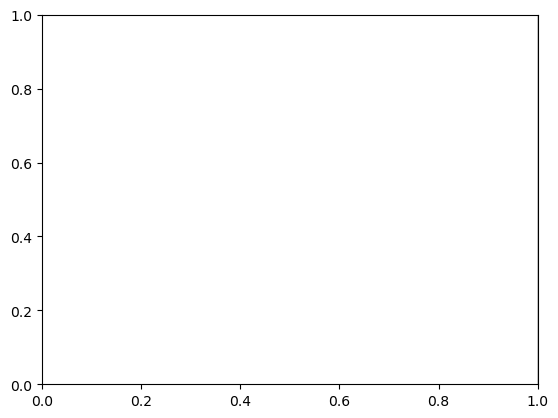

In [34]:
plotshow(df5,"Runtime_in_min")

In [34]:
def boundaries(data , variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 -Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return lower , upper

In [35]:
df6 = df5.copy()

In [36]:
df6["Runtime_in_min"] = np.where(df6["Runtime_in_min"]<10,10,
                                np.where(df6["Runtime_in_min"]>180,180,df6["Runtime_in_min"]))

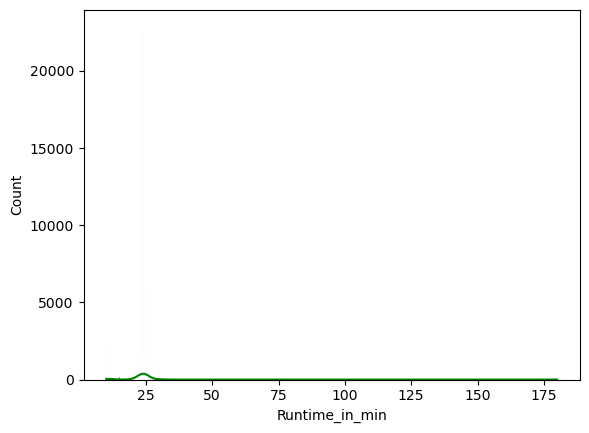

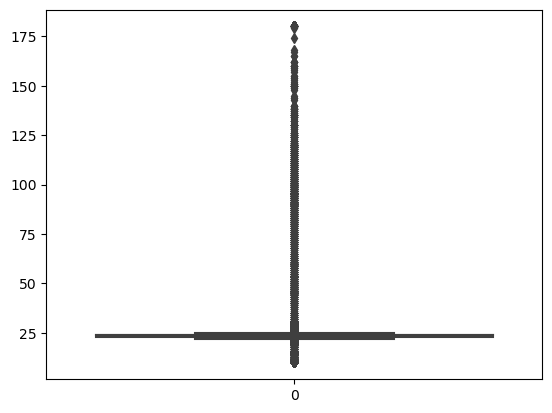

In [354]:
plotshow(df6,"Runtime_in_min")

In [37]:
df6.shape

(45716, 12)

# A good way to handle outliers is using np.where() function.

In [328]:
"""
df6 = df5.copy()
outliers = np.where(df6["User Rating"]<lb , True,
        np.where(df6["User Rating"]>ub,True, False))
df6.loc[outliers]
"""

Title  \
26     The Lord of the Rings: The War of the Rohirrim   
53                            Scott Pilgrim Takes Off   
95                               Sonic the Hedgehog 3   
160                                      Inside Out 2   
241                                    Coyote v. Acme   
...                                               ...   
45698                         Fighting General Daimos   
45699                         Fighting General Daimos   
45700                         Fighting General Daimos   
45701                         Fighting General Daimos   
45715                                   Marmalade Boy   

                              Genre  User Rating  Number of Votes  \
26     Animation, Action, Adventure          0.0              0.0   
53     Animation, Action, Adventure          0.0              0.0   
95     Animation, Action, Adventure          0.0              0.0   
160    Animation, Adventure, Comedy          0.0              0.0   
241    Animation, Adventure, Comedy          0.0              0.0   
...                             ...          ...              ...   
45698  Animation, Action, Adventure          0.0              0.0   
45699  Animation, Action, Adventure          0.0              0.0   
45700  Animation, Action, Adventure          0.0              0.0   
45701  Animation, Action, Adventure          0.0              0.0   
45715      Animation, Comedy, Drama          0.0              0.0   

       Runtime_in_min           Year  \
26              130.0         (2024)   
53               24.0       (2023– )   
95               24.0         (2024)   
160              24.0         (2024)   
241              98.0  Not_available   
...               ...            ...   
45698            24.0    (1978–1979)   
45699            24.0    (1978–1979)   
45700            24.0    (1978–1979)   
45701            24.0    (1978–1979)   
45715            24.0    (1994–2005)   

                                                 Summary  \
26     The untold story behind Helm's Deep, hundreds ...   
53     A 20-something Toronto indie rocker's adventur...   
95                                      Plot under wraps   
160    Follow Riley, in her teenage years encounterin...   
241    A story set in the ACME warehouse, the manufac...   
...                                                  ...   
45698                                      Not_Available   
45699                                      Not_Available   
45700                                      Not_Available   
45701                                      Not_Available   
45715                                      Not_Available   

                                                   Stars Certificate  Gross  \
26                                            No_details   Not Rated    0.0   
53     Mary Elizabeth Winstead,Aubrey Plaza,Brie Lars...       TV-14    0.0   
95                                            No_details   Not Rated    0.0   
160                                           No_details   Not Rated    0.0   
241                                           No_details          PG    0.0   
...                                                  ...         ...    ...   
45698                                         No_details   Not Rated    0.0   
45699                                         No_details   Not Rated    0.0   
45700                                         No_details   Not Rated    0.0   
45701                                         No_details   Not Rated    0.0   
45715  Ogie Banks,Deborah Sale Butler,John DeMita,Ric...   Not Rated    0.0   

       Episode                                   Episode Title  
26           0                                   Not_available  
53           0                                   Not_available  
95           0                                   Not_available  
160          0                                   Not_available  
241          0                                   Not_avail

In [ ]:
# df6 = df6.loc(~outliers)  --------To remove Outliers

In [ ]:
'''
df6["User Rating"] = np.where(df6["User Rating"]<lb & df6["User Rating"]!=0, lb,
                              np.where(df6["User Rating"]>ub,ub, df6["User Rating"]))
sns.boxplot(df6["User Rating"])
'''

# Machine Learning Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
df7 = df6.drop(["Title", "Year", "Episode Title", "Summary" ], axis =1)
df7.head()

Genre  User Rating  Number of Votes  Runtime_in_min  \
0  Animation, Action, Adventure          8.9         187689.0            24.0   
1  Animation, Action, Adventure          7.4          28895.0            99.0   
2  Animation, Adventure, Comedy          7.1         189108.0            92.0   
3  Animation, Action, Adventure          9.1         434457.0            24.0   
4  Animation, Action, Adventure          8.5          82909.0            24.0   

                                               Stars Certificate     Gross  \
0  Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...       TV-14  187689.0   
1                                         No_details          PG   28895.0   
2                                         No_details          PG  189108.0   
3  Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...       TV-MA  434457.0   
4  Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...       TV-MA   82909.0   

   Episode  
0        0  
1        0  
2        0  
3        0  
4        0

In [38]:
del df8

NameError: name 'df8' is not defined

In [39]:
dummy = pd.get_dummies(df7, drop_first=True)
df8 = dummy
df8.head()

User Rating  Number of Votes  Runtime_in_min     Gross  Episode  \
0          8.9         187689.0            24.0  187689.0        0   
1          7.4          28895.0            99.0   28895.0        0   
2          7.1         189108.0            92.0  189108.0        0   
3          9.1         434457.0            24.0  434457.0        0   
4          8.5          82909.0            24.0   82909.0        0   

   Genre_Action, Animation  Genre_Action, Animation, Adventure  \
0                        0                                   0   
1                        0                                   0   
2                        0                                   0   
3                        0                                   0   
4                        0                                   0   

   Genre_Action, Animation, Comedy  Genre_Action, Animation, Drama  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   Genre_Action, Animation, Family  Genre_Action, Animation, Fantasy  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   Genre_Action, Animation, Sci-Fi  Genre_Action, Animation, War  \
0                                0                             0   
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   

   Genre_Action, Romance, Animation  Genre_Action, Short, Adventure  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Genre_Adventure, Animation  Genre_Adventure, Animation, Comedy  \
0                           0                                   0   
1                           0                                   0   
2                           0                                   0   
3                           0                                   0   
4                           0                                   0   

   Genre_Adventure, Animation, Drama  Genre_Adventure, Animation, Family  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   Genre_Adventure, Animation, Fantasy  Genre_Adventure, Drama, Animation  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   Genre_Adventure, Family, Fantasy  Genre_Adventure, Short, Action  \
0                                 0                               0   
1                 

In [40]:
df8.shape

(45716, 6694)

In [41]:
x = df8.drop("User Rating", axis = 1)
y = df8["User Rating"]

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [43]:
# since the target variable is continuos we cannot use classifier models.
models = {
    "LinearRegression":{
    "model": LinearRegression(),
    "param": {

    }},
    "LogisticRegression":{
    "model": LogisticRegression(),
    "param": {
        "C":[1,2,3,4,5],
    }},
    #"KNeighborsClassifier":{
    #"model": KNeighborsClassifier(),
    #"param": {
    #    "n_neighbors":[1,2,4,5,10],
    #    "weights":["uniform", "distance"],
    #}},
    #"GaussianNB":{
    #"model": GaussianNB(),
    #"param": {
    #}},
    #"SVC":{
    #"model": SVC(gamma = "auto"),
    #"param": {
    #    "kernel":['linear', 'rbf', 'sigmoid'],
    #    "C":[1,5,10,15],
    #    "gamma":["auto"]
    #}},
    #"RandomForestClassifier":{
    #"model": RandomForestClassifier() ,
    #"param": {
    #    "n_estimators": np.arange(80,120,5) ,
    #    "criterion":["gini", "entropy", "log_loss"],
    #}},
    
}

NameError: name 'GaussianNB' is not defined

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
score =[]
for model, md in models.items() :
    mod = RandomizedSearchCV(md["model"], md["param"], cv=3, return_train_score=False, error_score= 'raise', verbose=3, n_iter=10 )
    mod.fit(xtrain, ytrain)
    score.append({
        "model_name":model ,
        "best_score":mod.best_score_ ,
        "best_parameters":mod.best_params_,
        "best_estimator":mod.best_estimator_
    })

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................................., score=0.554 total time= 1.7min
[CV 2/3] END ..................................., score=0.549 total time= 1.7min
[CV 3/3] END ......................, score=-7649201453109.043 total time= 1.7min


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 5 candidates, totalling 15 fits


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [59]:
model_lr = LinearRegression()
model_lr.fit(xtrain,ytrain)

LinearRegression()

In [60]:
model_lr.score(xtest, ytest)

0.5555921500072327

In [ ]:
svr = SVR()
svr.fit(xtrain, ytrain)

In [ ]:
svr.score(xtest , ytest)